Fútbol Match Highlights<br>
Focus vs Unfocused Model - Capstone 2<br>
Tom Widdows

This notebook trains and saves a model that can distinguish between in-focus faces and out-of-focus faces.<br><br>
In the picture below, the face detector located 5 faces.  The player in the foreground is in very sharp focus while the remaining 4 players are out-of-focus. Face recognition should work with the in-focus player but not with the remaining 4 out-of-focus players.
 

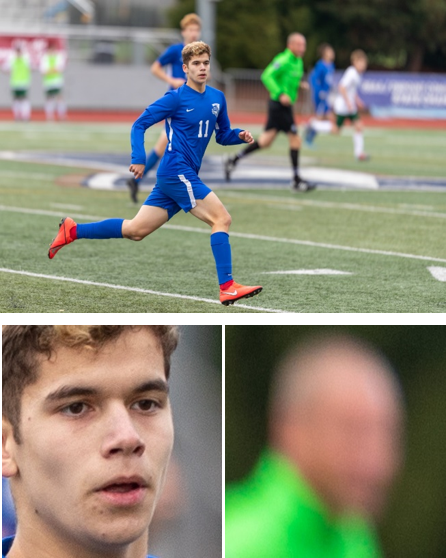

The main application loads this model and verifies that detected faces in the current image are in-focus before attempting facial recognition.  The notebooks purpose is to train and save a model for later use in the main applicaiton. 

##### Housekeeping...

In [1]:
import sys
sys.path.append('../../code')
import settings as s

import numpy as np 
import pandas as pd 
from pathlib import Path
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from support_class import Fball, time_it
import time

start_all = time.time()  # track time for notebook to run
%matplotlib inline

Using TensorFlow backend.


##### Common variables and settings...

In [2]:
# common variables used throughout the notebook
random.seed(14)

# save figure unique filenames
cm_valid_fig = Fball.checkfile('06 - 01 Baseline Focused vs Unfocused Model CM Valid.jpg')
cm_test_fig = Fball.checkfile('06 - 01 Baseline Focused vs Unfocused Model CM Test.jpg')

#### Get and Load our two datasets

In [3]:
in_focus_faces = [f for f in Path(s.FOCUSED_VS_UNFOCUSED_DATASET_jn / 'baseline_in_focus_faces').iterdir()]
out_of_focus_faces = [f for f in Path(s.FOCUSED_VS_UNFOCUSED_DATASET_jn / 'baseline_out_of_focus_faces').iterdir()]
Fball.count_summary([in_focus_faces, out_of_focus_faces], ['images in-focus', 'images out-of-focus faces', 'total images'])

  655 images in-focus
1,701 images out-of-focus faces
2,356 total images


In [4]:
# feature engineering for sharp images
@time_it
def get_in_focus_faces_df():
    return Fball.get_data(in_focus_faces) # multiprocessing for speed
df_in_focus = get_in_focus_faces_df()

00:00:14


In [5]:
# feature engineering for defocused images
@time_it
def get_out_of_focus_faces_df():
    return Fball.get_data(out_of_focus_faces) # multiprocessing for speed
df_out_of_focus = get_out_of_focus_faces_df()

00:00:16


#### Combine the data

In [6]:
df = pd.DataFrame()
df = df.append(df_in_focus)
df = df.append(df_out_of_focus)
feature_names = ['laplace-mean','laplace-var','laplace-max',
                 'sobel-mean','sobel-var','sobel-max',
                 'roberts-mean','roberts-var','roberts-max',
                 'canny-mean','canny-var','canny-max']
df.columns = feature_names

##### Scale and split data

In [7]:
# prepare and split the data
X = df
y = np.concatenate((np.ones(df_in_focus.shape[0]), np.zeros(df_out_of_focus.shape[0])), axis=0)

scaler = StandardScaler().fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = feature_names

X_train, y_train, X_valid, y_valid, X_test, y_test, X_train_and_valid, y_train_and_valid = Fball.train_valid_test(X, y, hyperopt_train_set=False)


Total Data:                   2,356  100%  X

Test (holdout) data:            236   10%  X_test
Train and Validation data:    2,120   90%  X_train_and_valid

Train data:                   1,696   72%  X_train
Validation data:                424   18%  X_valid



##### Train on the train data and predict on the validation data

The baseline score (roc_auc) on the validation set is 96.97%



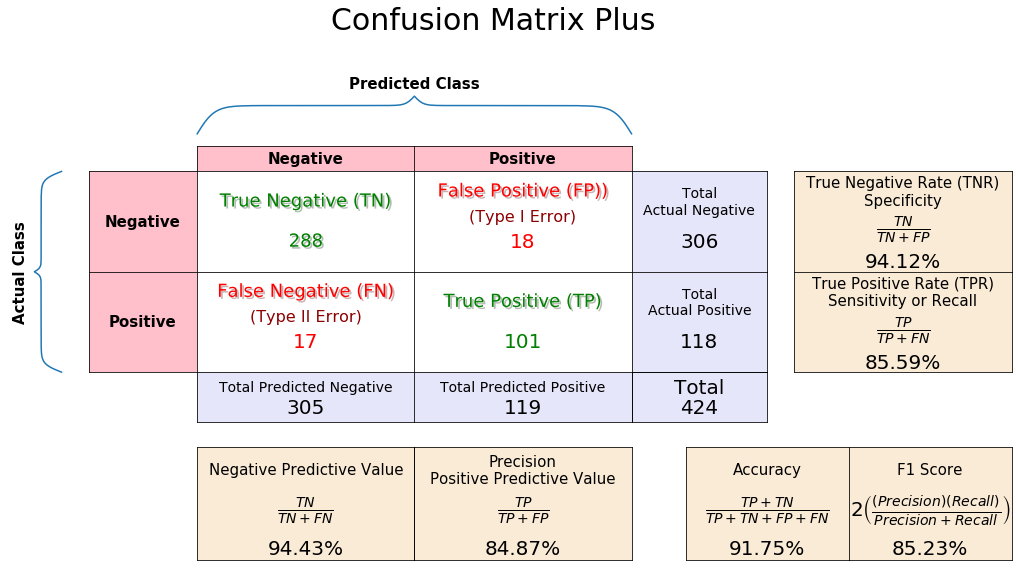


The kappa score is 79.50%

The MCC score is 79.51%

00:00:01


In [8]:
model = GaussianNB()
y_pred_prob = Fball.eval_model_valid(model, X_train, y_train, X_valid, y_valid, print_kappa=True, print_mcc=True, save_fig=cm_valid_fig)

The baseline score (roc_auc) on the validation set is 97.15%



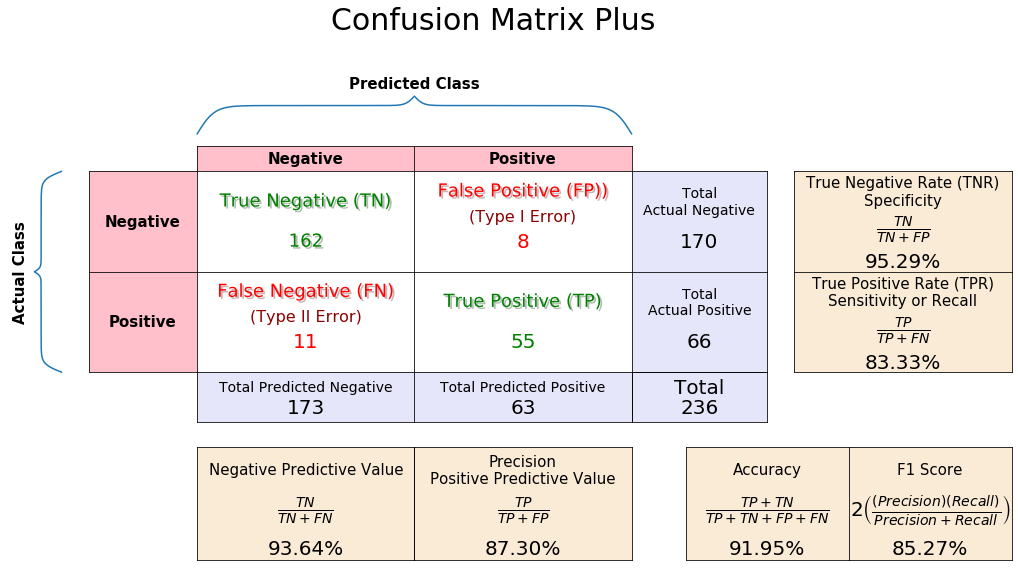


The kappa score is 79.74%

The MCC score is 79.78%

00:00:01


In [9]:
y_pred_prob = Fball.eval_model_valid(model, X_train, y_train, X_test, y_test, print_kappa=True, print_mcc=True, save_fig=cm_test_fig)

#### Save the model

In [10]:
Fball.save_model(model, 'baseline_focused_vs_unfocused_model')
Fball.save_model(scaler, 'baseline_focused_vs_unfocused_scaler')

In [11]:
print(f'{time.strftime("%H:%M:%S", time.gmtime(int(time.time() - start_all)))}')

00:00:34
